In [1]:
#hide
options(jupyter.plot_scale = 3)
options(jupyter.display_mimetypes = c("text/html"))
options(jupyter.rich_display=FALSE)
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res=300)
options(max.print=1000)

# "R : Random Sampling and Integration"
> "전북대학교 R입문 11주차 필기"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Kim Jeewoo
- categories: [Introduction to R]
- image: images/20211119main.jpg

In [1]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.5     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



# 랜덤변수의 생성

## runif(N): 균등분포

- `runif(N)`을 실행하면 0 ~ 1 사이의 난수를 N개 리턴한다.

- `runif(n = N, min = a, max = b)`을 실행하면 a ~ b 사이의 난수를 N개 리턴한다.

In [2]:
runif(5)

[1] 0.11334395 0.95849430 0.33370081 0.29666283 0.03408856

In [3]:
runif(n = 5, min = 3, max = 5)

[1] 3.203002 4.315035 3.098178 4.031787 4.812917

### Application

In [4]:
runif(5)*2 # 0 ~ 2 사이의 난수를 리턴

[1] 0.44864585 1.02495101 0.26648239 0.40143761 0.01934863

In [5]:
(runif(5)*3)+4 # 4 ~ 7 사이의 난수를 리턴

[1] 5.147784 4.722940 5.911367 6.926015 4.970684

### Problem

$$\text{Find}\int_0^2 |x^2(x-1)|dx$$

#### Solution I

$$ \begin{aligned}
\int_0^2 |x^2(x-1)|dx &= \int_0^1 |x^2(x-1)|dx + \int_1^2 |x^2(x-1)|dx\\\\\\&=-\int_0^1 x^2(x-1)dx + \int_1^2 x^2(x-1)dx\\\\\\&=-\int_0^1 (x^3-x^2)dx + \int_1^2 (x^3-x^2)dx\\\\\\&= -\left[\dfrac{1}{4}x^4 - \dfrac{1}{3}x^3\right]_0^1 + \left[\dfrac{1}{4}x^4 - \dfrac{1}{3}x^3\right]_1^2\\\\\\&= -\left(\dfrac{1}{4}-\dfrac{1}{3}\right) + \left(\dfrac{16}{4}-\dfrac{8}{3}\right)-\left(\dfrac{1}{4}-\dfrac{1}{3}\right)\\\\\\&=\dfrac{3}{2}
\end{aligned}$$

#### Solution II

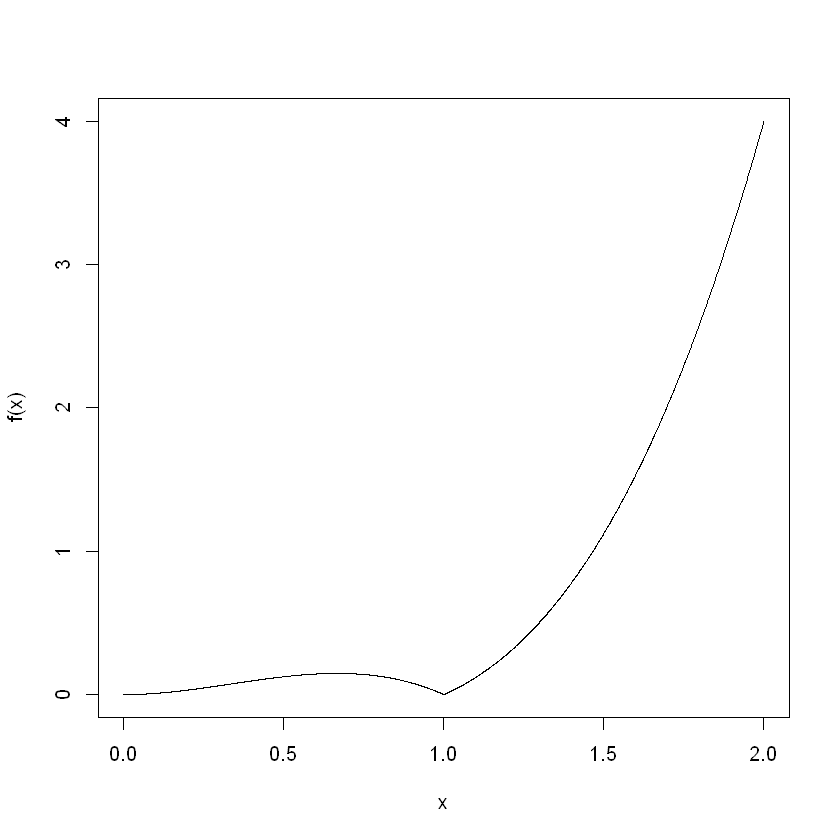

In [6]:
f = function(x) abs(x**2 *(x-1))

x = seq(0,2, by=0.001)

plot(x, f(x), type = 'l')

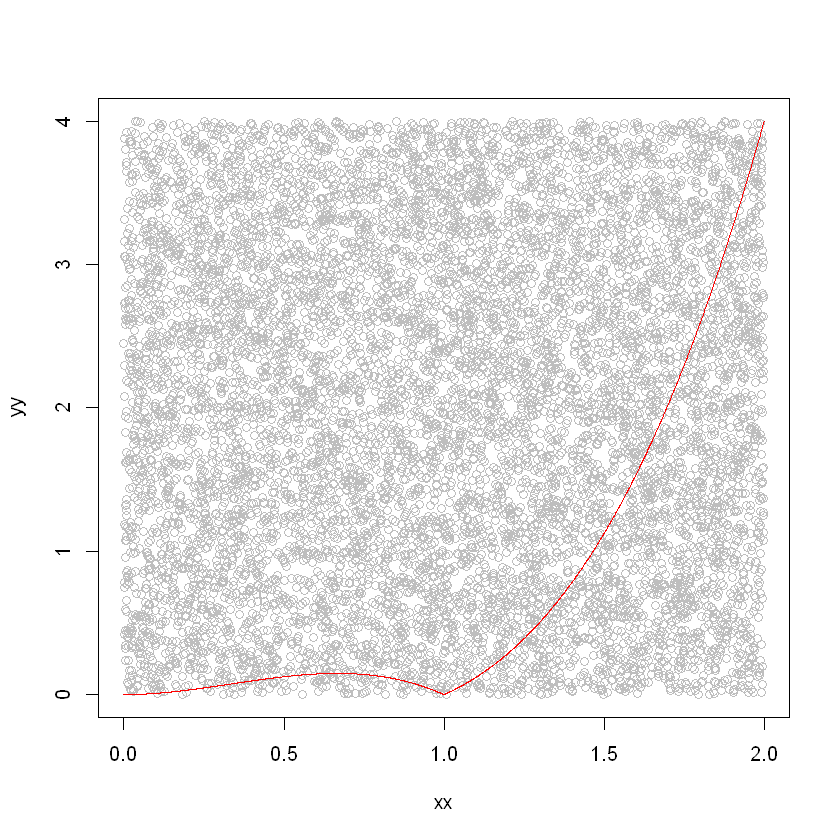

In [7]:
xx = runif(10000) * 2
yy = runif(10000) * 4

plot(xx, yy, col = 'gray')
lines(x, f(x), col = 'red')

- 빨간색 그래프 아래에 있는 넓이가 적분값이다. 

In [8]:
test = function(xx, yy){
    yy < f(xx)
}

In [9]:
A = test(xx, yy) 

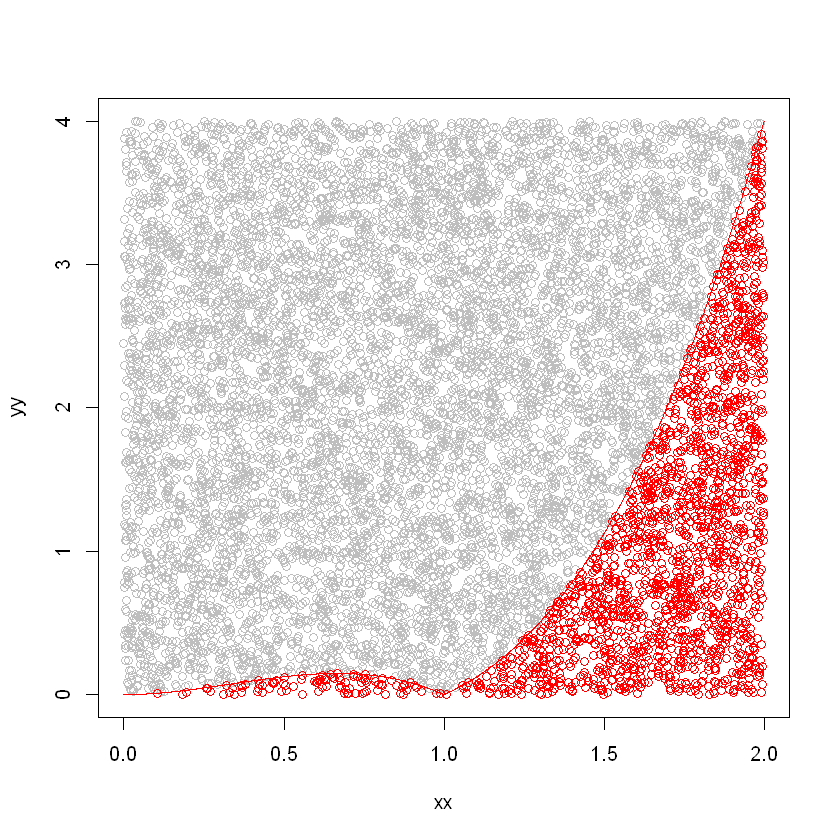

In [10]:
plot(xx, yy, col = "gray")
lines(x, f(x), col = "red")
points(xx[A], yy[A], col= "red")

$ \text{적분값} = \text{사각형의 크기}\times\dfrac{\text{빨간색 점의 개수}}{\text{전체 점의 개수}}$

In [11]:
8 * (sum(A)/length(A))

[1] 1.5368

- `Solution I`에서 구한 값과 유사하다.
- 표본을 늘리면 오차가 줄어들 것 같다.

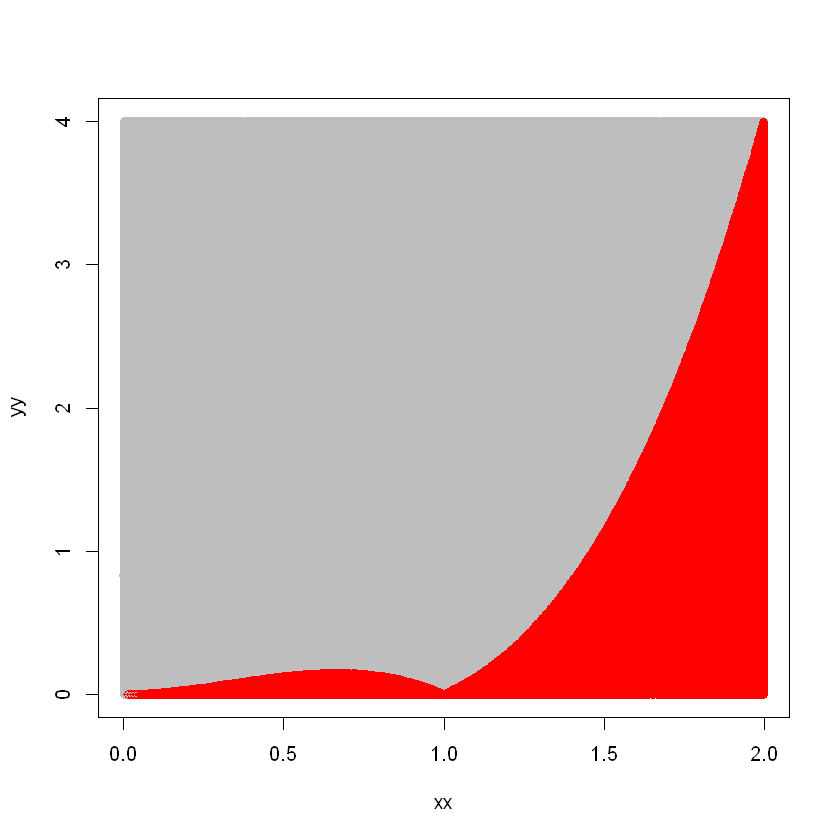

In [12]:
xx = runif(1000000) * 2
yy = runif(1000000) * 4
A = test(xx, yy)

plot(xx, yy, col = "gray")
lines(x, f(x), col = "red")
points(xx[A], yy[A], col= "red")

In [13]:
8 * (sum(A)/length(A))

[1] 1.496296

- 답은 1.5이다.

## rbinom(n, size = a, prob = b): 이항분포

- `rbinom(N, size = a, prob = b)`

- 앞면이 나올 확률이 **b**인 동전을 **a**번 던졌을 때 앞면이 나온 횟수를 리턴한다. 위 시행을 **n**번 반복한다.

- **b=0.5**이면 베르누이 분포이다.(베르누이 분포는 이항분포의 특수한 경우이다.)

In [14]:
rbinom(1,size=10,prob=0.9)

[1] 9

- 위 코드는 앞면이 나올 확률이 0.9인 동전을 10번 던졌더니 8번 앞면이 나온 것이다.

In [15]:
rbinom(1,size=10,prob=0.9)

[1] 7

- 위 코드는 앞면이 나올 확률이 0.9인 동전을 10번 던졌더니 7번 앞면이 나온 것이다. 

- 이러한 시행을 계속해서 반복하면, 즉 **N**의 크기를 늘린다면 그 평균은 9에 수렴하지 않겠는가? 실제로 그렇다.

In [16]:
rbinom(10000, size=10, prob=0.9) %>% mean

[1] 9.0035

## sample(a, size = n, prob = p, replace = TRUE or FALSE): 집합에서의 샘플링

- `sample(a, size = n)`를 실행하면 집합 **a**에서 **n**개의 원소를 비복원추출한다.

- `sample(a, size = n, replace = TRUE)`를 실행하면 집합 **a**에서 **n**개의 원소를 복원추출한다.

- `sample(a, size = n, prob = c(p_1, p_2 ....p_k))`을 실행하면 원소의 개수가 **k**인 집합 **a**에서 **n**개의 원소를 뽑되, 각 원소가 뽑힐 확률을 제어할 수 있다. 이 때 확률 벡터는 **a의 인덱스 순**으로 입력해야 한다.

In [17]:
set = c('red', 'red', 'blue', 'blue', 'blue')
sample(set, size = 4)

[1] "blue" "blue" "red"  "red"

In [18]:
sample(set, size = 4)

[1] "blue" "red"  "blue" "blue"

In [19]:
sample(set, size = 4, replace = TRUE)

[1] "blue" "blue" "blue" "blue"

In [20]:
sample(set, size = 4, replace = TRUE)

[1] "blue" "blue" "red"  "red"

In [21]:
set = c('red', 'blue')
sample(set, size = 5, prob = c(0.2, 0.8), replace = TRUE)

[1] "blue" "blue" "blue" "red"  "blue"

In [22]:
sample(set, size = 5, prob = c(0.2, 0.8))

ERROR: Error in sample.int(length(x), size, replace, prob): 'replace = FALSE' 일때는 모집단보다 큰 샘플을 가질 수 없습니다


- 위 코드는 비복원추출인데, 원소가 2개인 집합에서 5개의 원소를 뽑으려 했기 때문에 오류가 발생한 것이다.

In [23]:
sample(set, size = 2, prob = c(0.2, 0.3), replace = TRUE)

[1] "red"  "blue"

In [24]:
sample(set, size = 2, prob = c(32.2, 44.3), replace = TRUE)

[1] "red"  "blue"

In [25]:
#collapse-output
set = c('red', 'blue')
rslt = matrix(rep("_", 1000*2), ncol = 2)
rslt

_,_
_,_
_,_
_,_
_,_
_,_
_,_
_,_
_,_
_,_
_,_


In [26]:
#collapse-output
for (i in 1:1000) rslt[i,] = sample(set, size = 2, prob=c(0.95,0.05))
rslt

red,blue
red,blue
red,blue
red,blue
red,blue
red,blue
red,blue
red,blue
red,blue
red,blue
red,blue


In [27]:
sum(rslt[,1] == "red")/1000

[1] 0.956

# 과제: 유리로 된 징검다리 건너기

## Problem

![](image/20211119work.jpg)

유리와 강화유리가 한 쌍으로 이루어진 징검다리가 총 5개 있다고 하자.(따라서 징검다리는 모두 10개이다.)

강화유리로 된 징검다리를 밟으면 살아남지만 유리로 된 징검다리를 밟으면 죽는다.

따라서 강화유리로 된 징검다리를 골라야 살아남을 수 있다.

A씨는 유리공장에서 20년 근무한 장인으로 유리와 강화유리를 구분할 수 있는 능력을 가져서 강화유리로 된 징검다리를 고를 확률이 80%이다.

A씨가 살아남을 확률을 시뮬레이션을 통하여 구하여라.

### Solution

In [28]:

#수리적으로 구한 값

(0.8)^5 

[1] 0.32768

In [29]:

#천만번의 시뮬레이션을 통해 평균을 구한다.

num_repeat = 10000000
sum(rbinom(num_repeat, size=5, prob=0.8) == 5) / num_repeat

[1] 0.3277079

In [30]:

# mean으로도 가능한 것 같다.
num_repeat = 10000000
mean(rbinom(num_repeat, size=5, prob=0.8) == 5)

[1] 0.3277134

- 즉, 시뮬레이션으로 구한 A씨가 살아남을 확률은 약 0.3278이다.

## Problem

강화유리와 유리를 랜덤으로 찍는 참가자가 2명 있다고 하자. (따라서 강화유리를 고를 확률이 50%이다.)

(강화유리, 유리)의 징검다리가 3개 있다고 하자. (따라서 총 6개의 유리가 있고, 3번연속으로 강화유리를 고르면 2명 모두 살아남는다)

8000번의 시뮬레이션을 하였을 경우 아래의 질문에 답하라.

(질문1) 2명 모두 살아남는 경우는 몇번인가? 약 1000번

(질문2) 1명만 살아남는 경우는 몇번정도인가? 약 3000번 정도..

### Solution I

#### 2명 모두 생존하는 경우

In [31]:
simulate_all_sulv = function(N) return (sum(rbinom(8000,size=3,prob=0.5) == 3))

simulate_all_sulv(8000)

[1] 1006

#### 1명만 생존하는 경우

In [54]:
matt = sample(size = 8000*3, c(0,1), prob = c(5,5), replace = T) 
dim(matt) = c(8000, 3)
matt = as.tibble(matt)

sum(
(rbinom(sum(matt$V1==0), size = 2, prob = 0.5) == 2)%>% sum + 
(rbinom(sum((matt$V1==1)&(matt$V2==0)), size = 1, prob = 0.5) == 1) %>% sum +
(rbinom(sum((matt$V1==1)&(matt$V2==1)&(matt$V3==0)), size = 0, prob = 0.5) == 0) %>% sum
)


[1] 3026

### Solution II

In [33]:
simulate_one_sulv = function(N){ #N <- 시행 횟수
    matt = sample(size = N*3, c(0,1), prob = c(5,5), replace = T)
    dim(matt) = c(N, 3)

    for (i in 1:N){ # 사망하면 더이상 시도할 수 없으므로 0이후에 발생된 1은 0으로 교체한다.
        if (matt[i,1] == 0) matt[i,2] <- matt[i,3] <- 0 # 첫 번째에 사망한 경우 두 번째, 세 번째는 실패로 간주한다.
        else if (matt[i,2] == 0) matt[i,3] <- 0 # 두 번째에 사망한 경우 세 번째는 실패로 간주한다.
    }
    
    # sum은 1번 주자의 성공 횟수이다.
    matt = matt %>% as.tibble %>% mutate(sum = V1 + V2 + V3)

    # sum이 3이면 한 명만 생존하는 경우가 아니므로 summ이 0:2인 경우만 계산한다.
    rslt = c()
    for (i in 0:2) rslt[i+1] = (matt %>% filter(sum == i) %>% count %>% as.numeric %>% rbinom(size = 2-i, prob = 0.5) == 2-i) %>% sum
    return(sum(rslt))
}

In [34]:
simulate_one_sulv(8000)

[1] 3012

### 다른 시도들

In [35]:
simulate_one_sulv = function(N){
    first_cross = rbinom(8000,size=3,prob=0.5)
    second_cross = 0
    ATA = 0
    for (i in 1:N){
        if (first_cross[i] == 3) next # 1번 주자가 모두 강화유리를 밟은 경우, 즉 전원 생존한다.
        else if (first_cross[i] == 2) second_cross = second_cross + 1 # 1번 주자가 첫 번째, 두 번째에서 강화유리를 밟고 세 번째에서 일반유리를 밟아 사망한 경우, 즉 2번 주자만 생존한다.
        else if (sample(size=2-first_cross[i], c(0,1), prob=c(5,5),replace=T) %>% prod == 1) second_cross = second_cross + 1

    }
    return(second_cross)
}
simulate_one_sulv(8000)

[1] 4769

In [36]:
simulate_one_sulv = function(N){
    first_cross = rbinom(8000,size=3,prob=0.5)
    second_cross = 0
    ATA = 0
    for (i in 1:N){
        if (first_cross[i] == 3) next # 1번 주자가 모두 강화유리를 밟은 경우, 즉 전원 생존한다.
        else if (first_cross[i] == 2) ATA = ATA + 1 # 1번 주자가 첫 번째, 두 번째에서 강화유리를 밟고 세 번째에서 일반유리를 밟아 사망한 경우, 즉 2번 주자만 생존한다.
        else if (sample(size=2-first_cross[i], c(0,1), prob=c(5,5),replace=T) %>% prod == 1) second_cross = second_cross + 1

    }
    print(ATA)
    return(second_cross+ATA)
}
simulate_one_sulv(8000)

[1] 2978


[1] 4730

In [37]:
zero = 0
one = 0
two = 0
three = 0

first_cross = rbinom(8000,size=3,prob=0.5)
for (i in first_cross){
    if (i == 0) zero = zero + 1
    else if (i == 1) one = one + 1
    else if (i == 2) two = two + 1
    else if (i == 3) three = three + 1
}
zero
one
two
three

[1] 1073

[1] 2987

[1] 2950

[1] 990

In [38]:
first_cross = rbinom(8000,size=3,prob=0.5)
sample(size = 0, prob = c(0.2, 0.8), replace = TRUE)

ERROR: Error in sample(size = 0, prob = c(0.2, 0.8), replace = TRUE): 기본값이 없는 인수 "x"가 누락되어 있습니다


fc = 0 이면 2번
fc = 1 이면 1번
fc = 2 이면 0번
fc = 3 이면 해당되지 않음

In [39]:
simulate_one_sulv = function(N){
    first_cross = rbinom(8000,size=3,prob=0.5)
    second_cross = 0
    for (i in 1:N){
        if (first_cross[i] == 3) next
        else if (first_cross[i] == 2) second_cross = second_cross + 1 
        else if (first_cross[i] == 1){
            if (sample(size=1, c(0,1), prob=c(5,5),replace=T) %>% prod == 1) second_cross = second_cross + 1
        }
        else if (first_cross[i] == 0){
            if (sample(size=2, c(0,1), prob=c(5,5),replace=T) %>% prod == 1) second_cross = second_cross + 1  
        }
    }

    return(second_cross)
}
simulate_one_sulv(8000)

[1] 4715

In [40]:
print(sample(size = 0, c(0,1), prob=c(5,5),replace=T))

numeric(0)


In [41]:
prod(numeric(2))

[1] 0

In [42]:
numeric(3)

[1] 0 0 0

In [51]:
matt = sample(size = 8000*3, c(0,1), prob = c(5,5), replace = T)
dim(matt) = c(8000, 3)

rslt = c()

for (i in 1:8000){
    if (matt[i,1] == 0) matt[i,2] <- matt[i,3] <- 0
    else if (matt[i,2] == 0) matt[i,3] <- 0
}
matt = matt %>% as.tibble %>% mutate(sum = V1 + V2 + V3)

for (i in 0:2){
    matt %>% filter(sum == 0) %>% count %>% as.numeric %>% rbinom(size = i, prob = 0.5) == i %>% sum
    B = matt %>% filter(sum == 1) %>% count %>% as.numeric
    C = matt %>% filter(sum == 2) %>% count %>% as.numeric
}
sum(rbinom(A, size=2, prob=0.5) == 2)
sum(rbinom(B, size=1, prob=0.5) == 1)
sum(rbinom(C, size=0, prob=0.5) == 0)

[1] 249361

[1] 991

[1] 1026

In [44]:
for (i in 1:3) print(i)

[1] 1
[1] 2
[1] 3


In [45]:
matt = sample(size = 8000*3, c(0,1), prob = c(5,5), replace = T)
dim(matt) = c(8000, 3)

rslt = c()

for (i in 1:8000){
    if (matt[i,1] == 0) matt[i,2] <- matt[i,3] <- 0
    else if (matt[i,2] == 0) matt[i,3] <- 0
}
matt = matt %>% as.tibble %>% mutate(sum = V1 + V2 + V3)

for (i in 0:2){
    matt %>% filter(sum == i) %>% count %>% as.numeric %>% rbinom(size = 2-i, prob = 0.5) == 2-i %>% sum %>% print
}

[1] 0
[1] 1
[1] 2


In [46]:
simulate_one_sulv = function(N){ #N <- 시행 횟수
    matt = sample(size = N*3, c(0,1), prob = c(5,5), replace = T)
    dim(matt) = c(N, 3)

    for (i in 1:N){ # 사망하면 더이상 시도할 수 없으므로 0이후에 발생된 1은 0으로 교체한다.
        if (matt[i,1] == 0) matt[i,2] <- matt[i,3] <- 0 # 첫 번째에 사망한 경우 두 번째, 세 번째는 실패로 간주한다.
        else if (matt[i,2] == 0) matt[i,3] <- 0 # 두 번째에 사망한 경우 세 번째는 실패로 간주한다.
    }

    # sum은 1번 주자의 성공 횟수이다.
    matt = matt %>% as.tibble %>% mutate(sum = V1 + V2 + V3)

    # sum이 3이면 한 명만 생존하는 경우가 아니므로 summ이 0:2인 경우만 계산한다.
    rslt = c()
    for (i in 0:2) rslt[i+1] = (matt %>% filter(sum == i) %>% count %>% as.numeric %>% rbinom(size = 2-i, prob = 0.5) == 2-i) %>% sum
    return(sum(rslt))
}

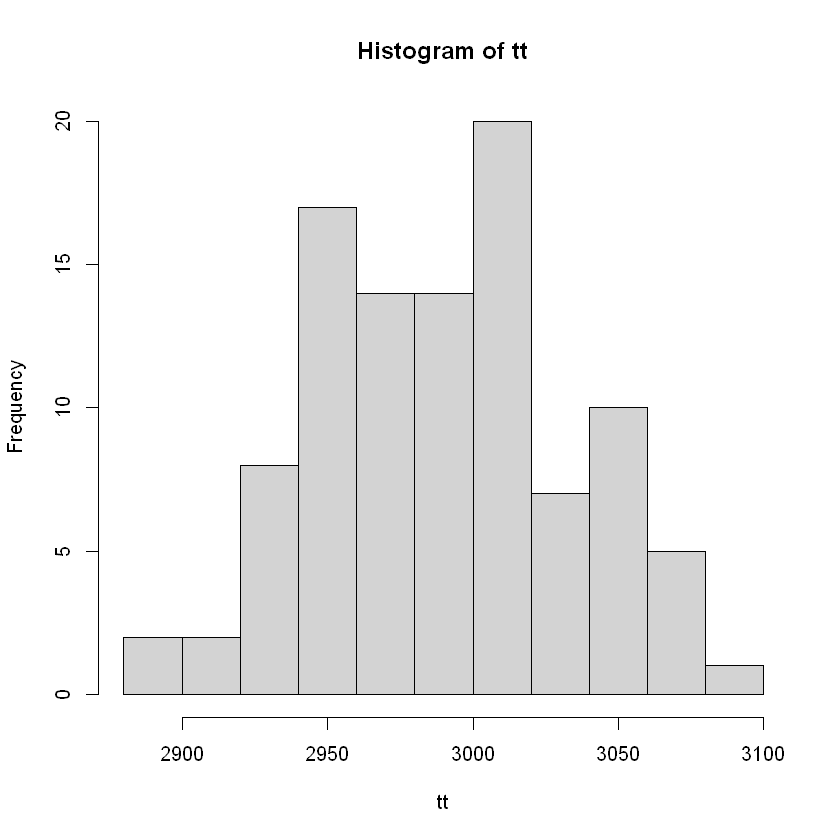

In [47]:
tt = c()
for (i in 1:100){
    tt[i] = simulate_one_sulv(8000)
}
hist(tt)

In [48]:
simulate_one_sulv = function(N){
    
    matt = sample(size = N*3, c(0,1), prob = c(5,5), replace = T)
    dim(matt) = c(N, 3)
    
    for (i in 1:N){
        if (matt[i,1] == 0) matt[i,2] <- matt[i,3] <- 0 
        else if (matt[i,2] == 0) matt[i,3] <- 0
    }   
    
    matt = matt %>% as.tibble %>% mutate(sum = V1 + V2 + V3)

    rslt = c()
    for (i in 0:2) rslt[i+1] = (matt %>% filter(sum == i) %>% count %>% as.numeric %>% rbinom(size = 2-i, prob = 0.5) == 2-i) %>% sum
    return(sum(rslt))
}
simulate_one_sulv(800)

[1] 298

In [49]:
matt %>% filter(sum == 1)

V1,V2,V3,sum
<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,1
1,0,0,1
1,0,0,1
1,0,0,1
1,0,0,1
1,0,0,1
1,0,0,1
1,0,0,1
1,0,0,1


In [50]:
as.dataframe(matt$V1)

ERROR: Error in as.dataframe(matt$V1): 함수 "as.dataframe"를 찾을 수 없습니다


In [ ]:
matt = sample(size = 8000*3, c(0,1), prob = c(5,5), replace = T)
dim(matt) = c(8000, 3)

for (i in 1:8000){ # 사망하면 더이상 시도할 수 없으므로 0이후에 발생된 1은 0으로 교체한다.
    if (matt[i,1] == 0) matt[i,2] <- matt[i,3] <- 0 # 첫 번째에 사망한 경우 두 번째, 세 번째는 실패로 간주한다.
    else if (matt[i,2] == 0) matt[i,3] <- 0 # 두 번째에 사망한 경우 세 번째는 실패로 간주한다.
}
    
# sum은 1번 주자의 성공 횟수이다.
matt = matt %>% as.tibble %>% mutate(sum = V1 + V2 + V3)

matt %>% filter(sum ==0) %>%count%>%as.numeric
matt %>% filter(sum ==1)%>%count%>%as.numeric
matt %>% filter(sum ==2)%>% count%>%as.numeric
# sum이 3이면 한 명만 생존하는 경우가 아니므로 summ이 0:2인 경우만 계산한다.
rslt = c()
for (i in 0:2) rslt[i+1] = (matt %>% filter(sum == i) %>% count %>% as.numeric %>% rbinom(size = 2-i, prob = 0.5) == 2-i) %>% sum



print(sum(rslt))